In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/controllable_sampled.csv', index_col = 'id')

## Building a baseline SVM model using all "controllable" features

In [6]:
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(df.drop('Label', 1), df.Label, test_size = 0.2, random_state = 42)

scaler = StandardScaler().fit(X_train0)
X_train_scaled0 = pd.DataFrame(scaler.transform(X_train0), columns = df.drop('Label', 1).columns)
X_test_scaled0 = pd.DataFrame(scaler.transform(X_test0), columns = df.drop('Label', 1).columns)

In [12]:
svm_base = svm.SVC(kernel = 'rbf')
svm_base.fit(X_train_scaled0, Y_train0)
Y_pred0 = svm_base.decision_function(X_test_scaled0)

fpr_svm0, tpr_svm0, thresholds_svm0 = metrics.roc_curve(Y_test0, Y_pred0)
auc_svm0 = metrics.auc(fpr_svm0, tpr_svm0)
acc_svm0 = np.mean(np.abs(Y_test0 - Y_pred0))

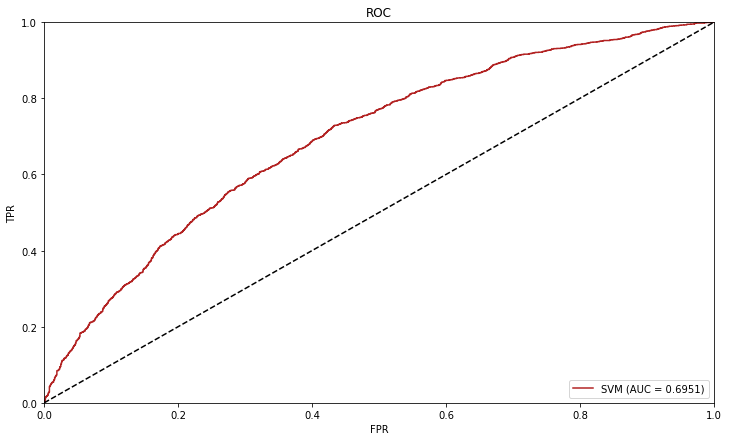

In [13]:
fig = plt.figure(figsize = (12,7))

plt.plot(fpr_svm0, tpr_svm0, color = "firebrick", label = "SVM (AUC = {:.4f})".format(auc_svm0))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = 'lower right')

plt.show()

In [11]:
print("Baseline model accuracy = {:.4f}".format(acc_smv0))

Baseline model accuracy = 0.8363


This is pretty impressive performance for a baseline model. Let's try to tune the hyperparameters to see if we gain any performance improvement.

### Hyperparameter selection

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters over which to search
param_grid = [
    {'C': np.logspace(-4, 1, num = 1000), 
     'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
]

scores = ['roc_auc', 'accuracy']

clf_RS = RandomizedSearchCV(svm.SVC(), param_distributions = param_grid, cv = 5, n_jobs = -1, 
                            scoring = scores, refit = scores[0])
clf_RS.fit(X_train_scaled0, Y_train0)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 1.01159111e-04, 1.02331658e-04, 1.03517796e-04,
       1.04717682e-04, 1.05931476e-04, 1.07159340e-04, 1.08401436e-04,
       1.09657929e-04, 1.10928986e-04, 1.12214777e-04, 1.13515471e-04,
       1.14831241e-04, 1.16162263e-04, 1.17508713e-04, 1.18870770e-04,
       1.20248614e-04, 1.21642429e-...
       8.03350198e+00, 8.12661920e+00, 8.22081576e+00, 8.31610415e+00,
       8.41249705e+00, 8.51000725e+00, 8.60864770e+00, 8.70843150e+00,
       8.80937190e+00, 8.91148232e+00, 9.01477631e+00, 9.11926760e+00,
       9.22497005e+00, 9.33189772e+00, 9.44006479e+00, 9.54948564e+00,
       9.66017480e+00, 9.77214697e+00, 9.88541702e+00, 1.00000000e+01]),
                                         'kernel': ['linear', 'rbf', 'sigmoid',
                                                    'poly']}],
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'])

In [16]:
clf_RS.best_params_

{'kernel': 'rbf', 'C': 0.24175940791691308}

In [20]:
print("AUC of best performing model: {:.5f}".format(clf_RS.best_score_))

AUC of best performing model: 0.69590
